In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### HOW TO SCALE NORMALIZE STANDARDIZE?
data pre-processing

    remove or fill missing values
    transfrom categorical / ordinal into numerical values
    deal with outliers (since they will skew the fit of the model)
    creating new features from existing ones Goal ist to achieve better ML results

scaling

regresssion with numbers in widely different scale ist an issue for variance: example 1 number in the dozens the other in the billions: creates problem as large scale number will be considerd "more important". We want all in comparable scale

option to deal with it

    (1) standardization: transform distribution to mean 0 and standard deviation of 1: For each data point subtract the mean and divide by standard deviation
    (2) normalization: from each data point substract minimum and divide by (max-min): Achievs that all values are between 0 and 1



In [32]:
#SET SIZE OF ALL PRINTS
plt.rcParams['figure.figsize'] = [25, 6]


In [33]:
credit_risk=pd.read_csv('credit_risk_dataset.csv')
credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#### NULL VALUES

In [34]:
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [35]:
credit_risk=credit_risk.dropna(how='any',axis=0)
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# TARGET IS loan_status
* We want to predict if someone will default (1) or not (0)
* We are dealing with a binary classification problem


In [36]:
credit_risk['loan_status']=np.where(credit_risk['loan_status']==1,'DENY','APPROVE')

<ipython-input-36-00af29b66e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk['loan_status']=np.where(credit_risk['loan_status']==1,'DENY','APPROVE')


In [37]:
credit_risk['loan_status'].isnull().sum()

0

In [38]:
"""#removed target column
credit_risk.drop('loan_status',axis=1,inplace=True)
"""

"#removed target column\ncredit_risk.drop('loan_status',axis=1,inplace=True)\n"

# INVESTIGATING

In [39]:
credit_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Investigating the numerical variables

In [40]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [41]:
# TO BE NOTES
# AGE 144 LOOKS SUSPICOUS

### Multicollinearity

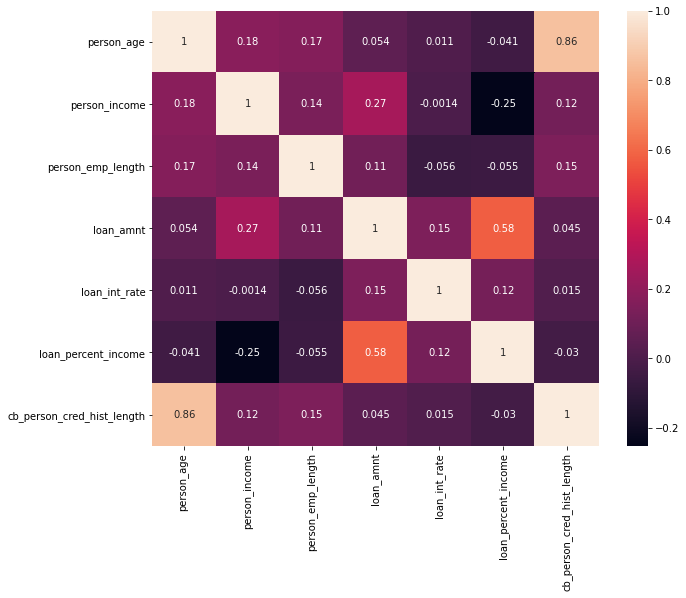

In [42]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(credit_risk.corr(), annot=True)
plt.show()

In [43]:
# Correlation with cb_person_cred_hist_length and age is annoyingly high.
# I'll get rid of cb_person_cred_hist_length to avoid multi colinarity 
credit_risk.drop('cb_person_cred_hist_length',axis=1,inplace=True)

C:\Users\april\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### DISTRIBUTION
taking care of distribution of numerical variables and feeding ne distributions into analysis datafram "df_norm"

In [44]:
df_norm=credit_risk
df_norm.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,DENY,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,APPROVE,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,DENY,0.57,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,DENY,0.53,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,DENY,0.55,Y


#### person_age

DescribeResult(nobs=28638, minmax=(20, 144), mean=27.727215587680703, variance=39.821664565805136, skewness=2.5647289679115506, kurtosis=18.71526930783637)


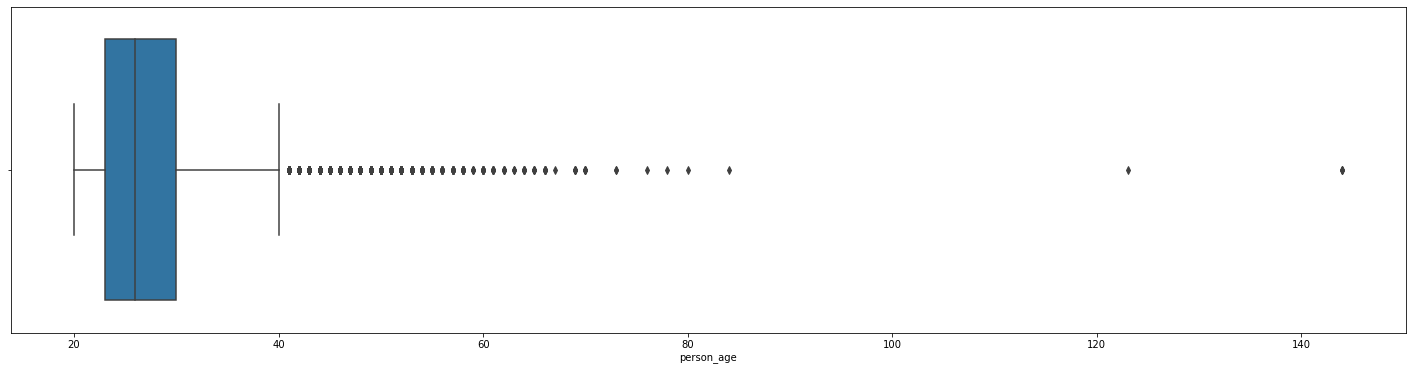

In [45]:
# AGE
#age 144 looked suspicous, but there is more
print(stats.describe(df_norm.person_age))
sns.boxplot(df_norm.person_age)

DescribeResult(nobs=28638, minmax=(0.41378387686969476, 0.4140799643130171), mean=0.41392553032725304, variance=3.583617084780445e-09, skewness=0.15487746701618882, kurtosis=-0.8817414276372864)


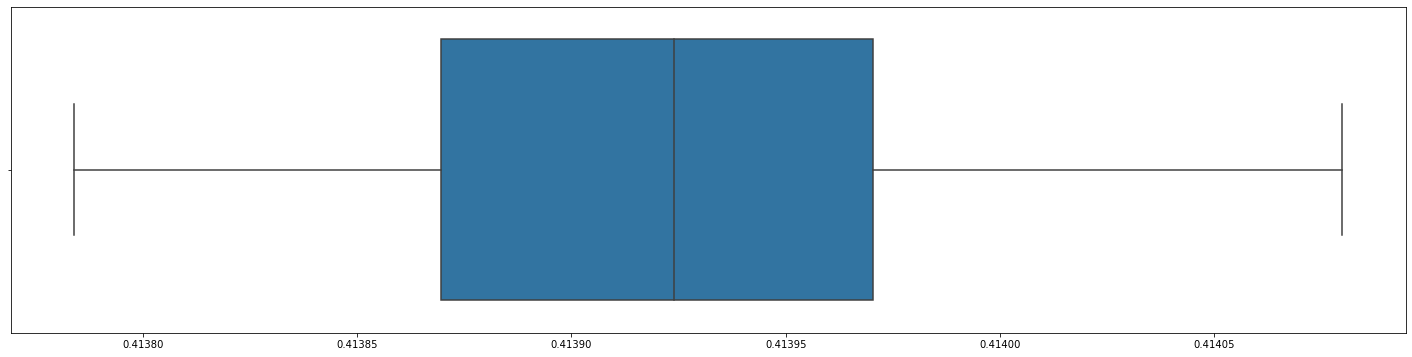

In [46]:
#boxcox array
age_array, lmbda = stats.boxcox(df_norm.person_age)
sns.boxplot(age_array)
print(stats.describe(age_array))
plt.show()


In [47]:
# feeding boxcox array to dataframe
df_norm['person_age']=age_array

<ipython-input-47-e5b6aea07c2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['person_age']=age_array


#### person_income

DescribeResult(nobs=28638, minmax=(4000, 6000000), mean=66649.37188351141, variance=3888326532.9361815, skewness=35.188780249995624, kurtosis=2955.548413444316)


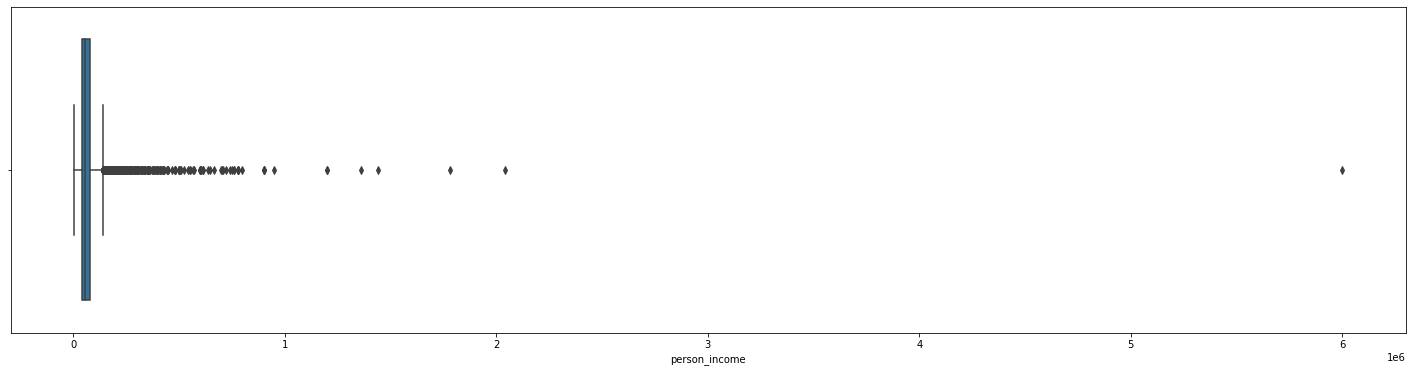

In [48]:
print(stats.describe(df_norm.person_income))
sns.boxplot(df_norm.person_income)

DescribeResult(nobs=28638, minmax=(6.012530313700186, 8.791380310871112), mean=7.20867942826867, variance=0.05136271652532924, skewness=-0.01555582268167787, kurtosis=0.9879525089019747)


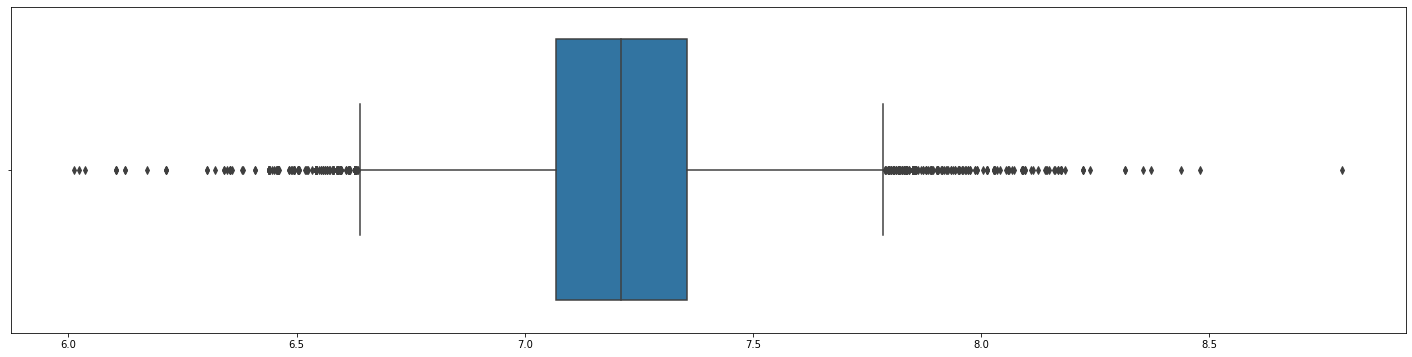

In [49]:
#boxcox array
income_array, lmbda = stats.boxcox(df_norm.person_income)
print(stats.describe(income_array))

sns.boxplot(income_array)
plt.show()

In [50]:
# feeding boxcox array to dataframe
df_norm['person_income']=income_array

<ipython-input-50-ea69cd6768aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['person_income']=income_array


In [51]:
#OUTLIERS
iqr = np.percentile(df_norm['person_income'],75) - np.percentile(df_norm['person_income'],25)
upper_limit = np.percentile(df_norm['person_income'],75) + 1.5*iqr 
lower_limit = np.percentile(df_norm['person_income'],25) - 1.5*iqr

df_norm['person_income'] = df_norm['person_income'][(df_norm['person_income']>lower_limit) & (df_norm['person_income']<upper_limit)]

<ipython-input-51-01b629a274da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['person_income'] = df_norm['person_income'][(df_norm['person_income']>lower_limit) & (df_norm['person_income']<upper_limit)]


In [52]:
#nan values were created.lets drop them
df_norm['person_income'].isnull().sum()

512

In [53]:
df_norm=df_norm.dropna(how='any',axis=0)

DescribeResult(nobs=28126, minmax=(6.63969226109463, 7.784927031505826), mean=7.210428016809628, variance=0.043118098323103336, skewness=-0.015559362208562738, kurtosis=-0.21557560515766205)


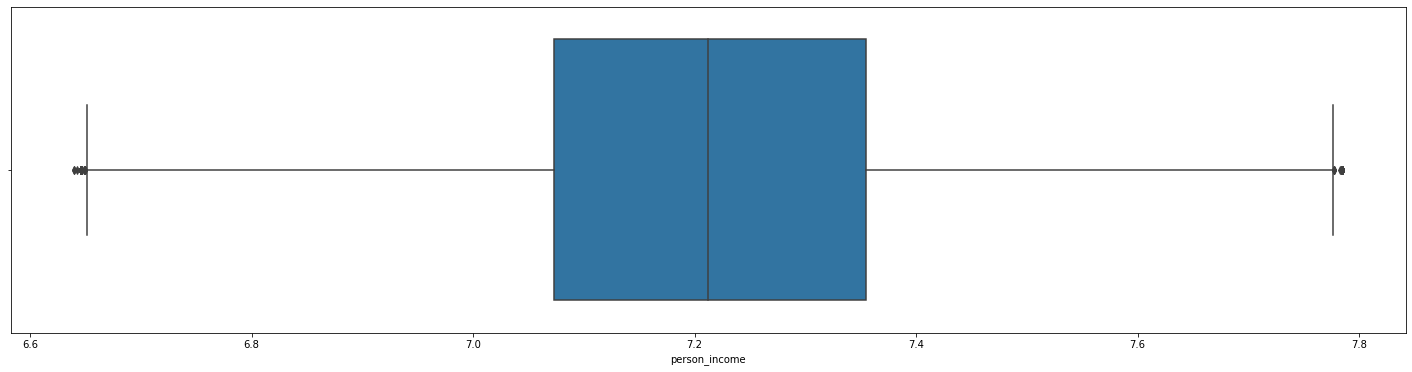

In [54]:

print(stats.describe(df_norm['person_income']))

sns.boxplot(df_norm['person_income'])
plt.show()

#### loan_amnt

DescribeResult(nobs=28126, minmax=(500, 35000), mean=9662.332894830406, variance=39174887.38318598, skewness=1.1621815397547683, kurtosis=1.3265639718039246)


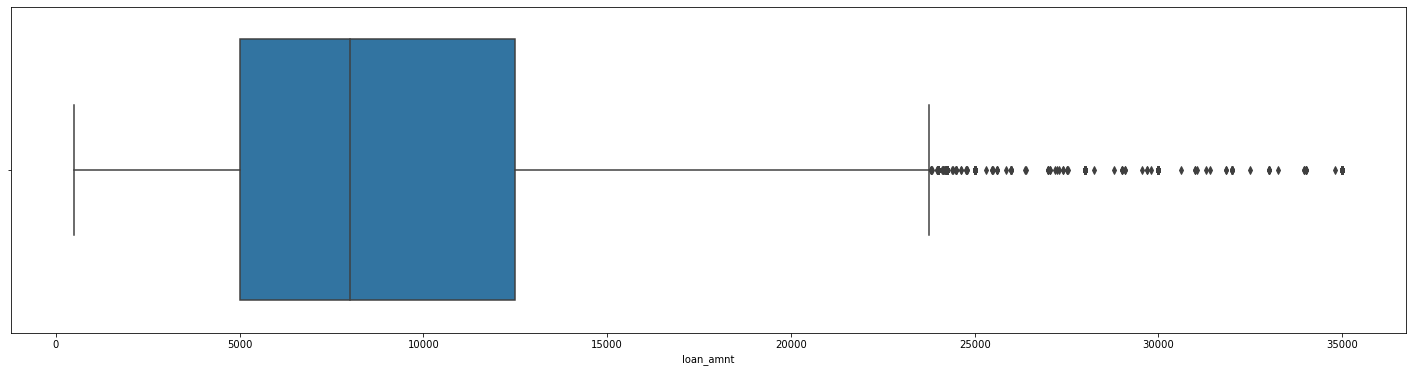

In [55]:
sns.boxplot(df_norm.loan_amnt)
print(stats.describe(df_norm.loan_amnt))

plt.show()

DescribeResult(nobs=28126, minmax=(14.490938203152691, 48.04042495783807), mean=32.58286633853099, variance=36.34454314504282, skewness=-0.020953493367834433, kurtosis=-0.3627510050948164)


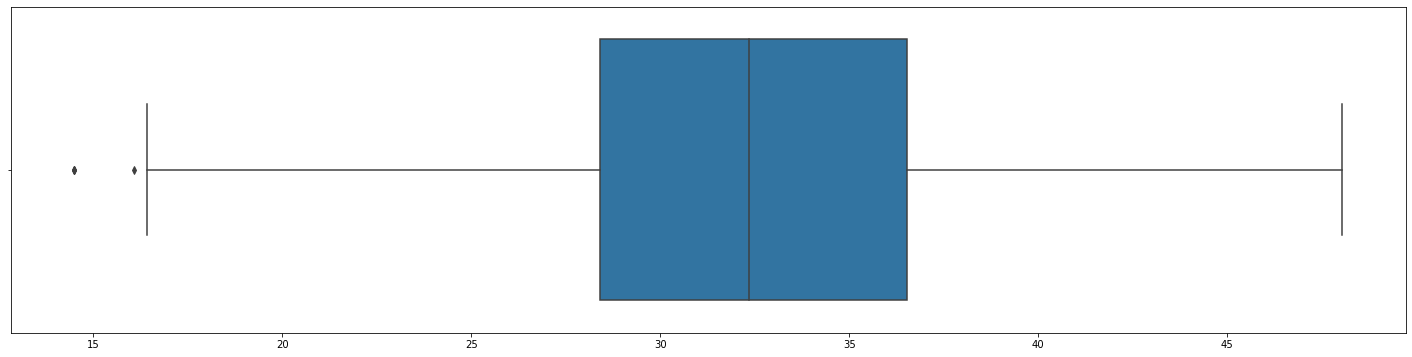

In [56]:
# boxcox loan_amnt
loan_amnt_array, lmbda = stats.boxcox(df_norm.loan_amnt)
print(stats.describe(loan_amnt_array))
sns.boxplot(loan_amnt_array)
plt.show()

In [57]:
# feeding boxcox array to dataframe

df_norm['loan_amnt']=loan_amnt_array

<ipython-input-57-f6fb1001135a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['loan_amnt']=loan_amnt_array


#### loan_int_rate

DescribeResult(nobs=28126, minmax=(5.42, 23.22), mean=11.027606485102753, variance=10.420094836216075, skewness=0.2048498571810015, kurtosis=-0.6629540013322761)


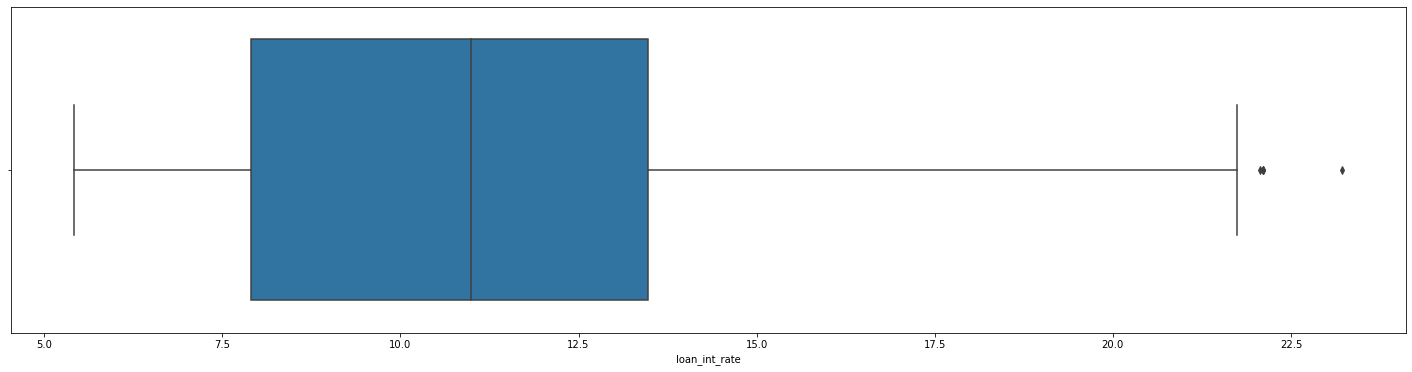

In [58]:
print(stats.describe(df_norm.loan_int_rate))
sns.boxplot(df_norm.loan_int_rate)
plt.show()

DescribeResult(nobs=28638, minmax=(2.7369086335369746, 8.120658163861071), mean=4.783633451280996, variance=1.1209507879355611, skewness=-0.04745827279319864, kurtosis=-0.8291373579153221)


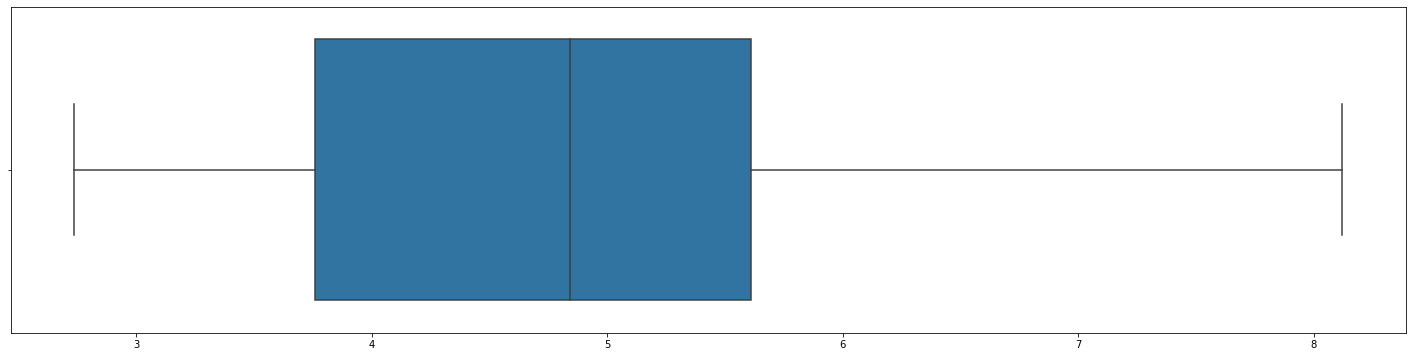

In [59]:


#BOXCOX WITH AWFULL RESULT
loan_int_rate_array, lmbda = stats.boxcox(credit_risk.loan_int_rate)
print(stats.describe(loan_int_rate_array))
sns.boxplot(loan_int_rate_array)
plt.show()

In [60]:
df_norm.loan_int_rate=loan_int_rate_array

ValueError: Length of values does not match length of index

#### loan_percent_income

DescribeResult(nobs=28126, minmax=(0.01, 0.83), mean=0.16920856147336982, variance=0.01104816293612079, skewness=1.0549705953493662, kurtosis=1.1859946713884897)


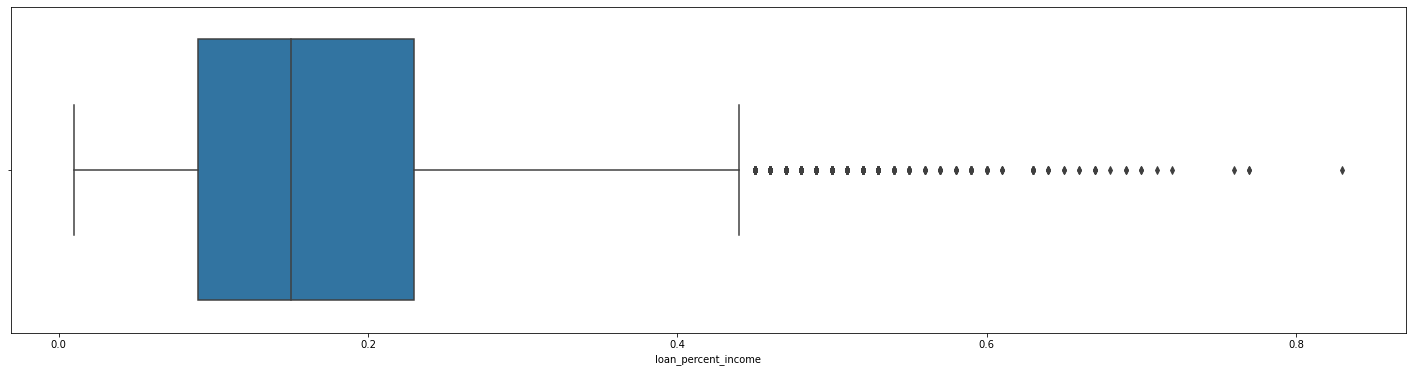

In [61]:
print(stats.describe(df_norm.loan_percent_income))
sns.boxplot(df_norm.loan_percent_income)
plt.show()

DescribeResult(nobs=28126, minmax=(-2.5030844447620857, -0.1812438148068888), mean=-1.4602938360552604, variance=0.1373822180154389, skewness=-0.02553593167712781, kurtosis=-0.3641440900388728)


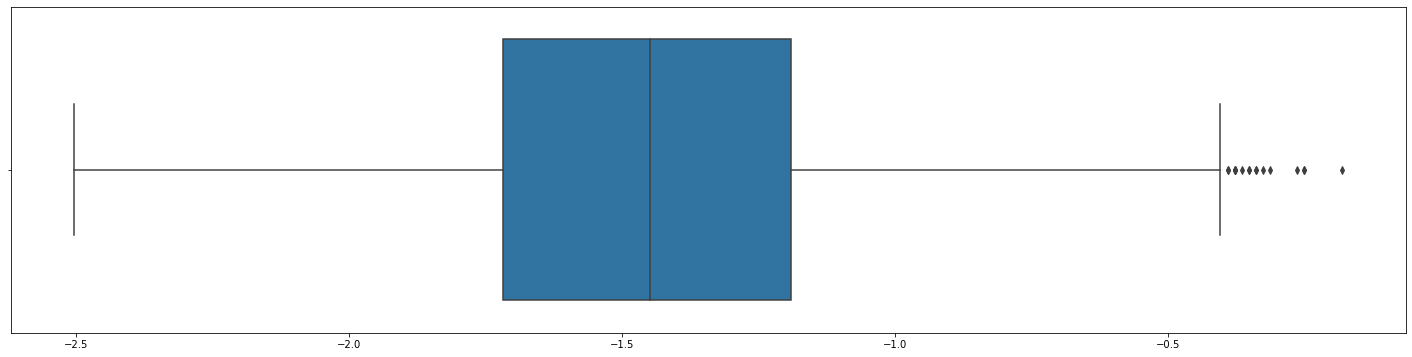

In [62]:
loan_percent_income_array, lmbda = stats.boxcox(df_norm.loan_percent_income)
print(stats.describe(loan_percent_income_array))
sns.boxplot(loan_percent_income_array)
plt.show()

In [63]:
# feeding boxcox array to dataframe
df_norm.loan_percent_income=loan_percent_income_array

C:\Users\april\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
iqr = np.percentile(df_norm.loan_percent_income,75) - np.percentile(df_norm.loan_percent_income,25)
upper_limit = np.percentile(df_norm.loan_percent_income,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm.loan_percent_income,25) - 1.5*iqr
df_norm.loan_percent_income = df_norm.loan_percent_income[(df_norm.loan_percent_income>lower_limit) & (df_norm.loan_percent_income<upper_limit)]


DescribeResult(nobs=28126, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


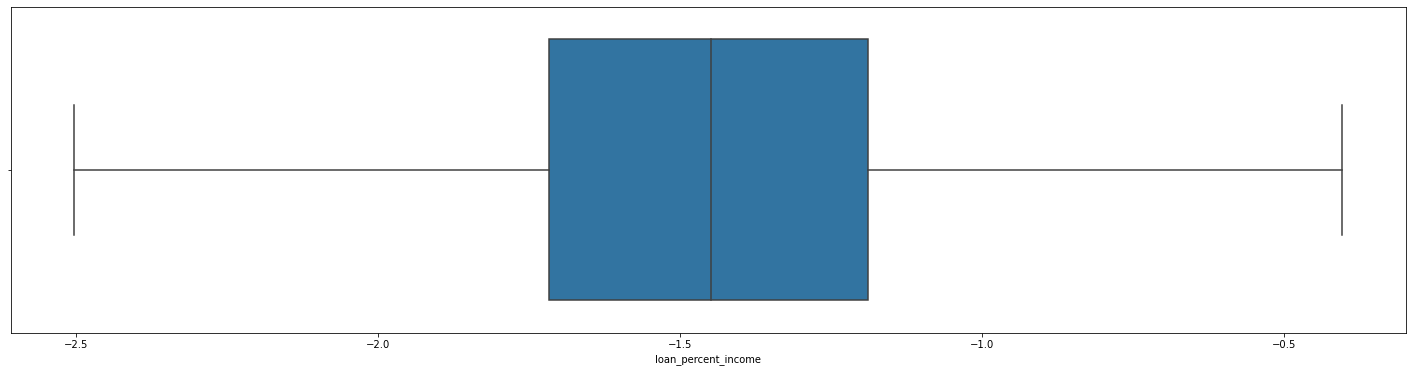

In [65]:
print(stats.describe(df_norm.loan_percent_income))
sns.boxplot(df_norm.loan_percent_income)
plt.show()

In [66]:
#resulted in null values again
df_norm.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income          17
cb_person_default_on_file     0
dtype: int64

In [67]:
df_norm=df_norm.dropna(how='any',axis=0)

#### person_emp_length
employment lenght

DescribeResult(nobs=28109, minmax=(0.0, 123.0), mean=4.799352520545021, variance=17.198105458085738, skewness=2.787637650176403, kurtosis=48.82360230190498)


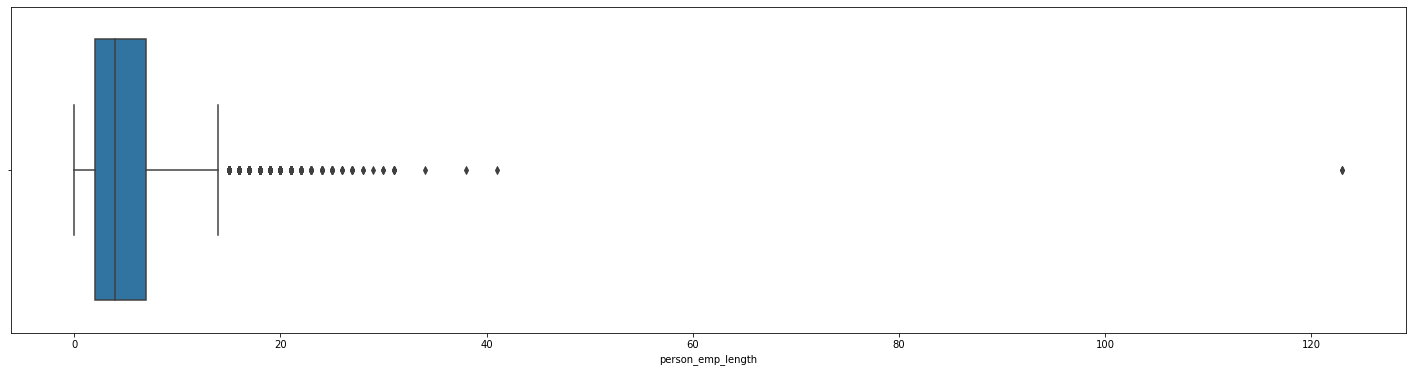

In [68]:
print(stats.describe(df_norm.person_emp_length))
sns.boxplot(df_norm.person_emp_length)
plt.show()

In [69]:
"""#boxcox
df_norm.person_emp_length_array, lmbda = stats.boxcox(df_norm.person_emp_length)
print(stats.describe(df_norm.person_emp_length_array))
sns.boxplot(df_norm.person_emp_length_array)
plt.show()"""

'#boxcox\ndf_norm.person_emp_length_array, lmbda = stats.boxcox(df_norm.person_emp_length)\nprint(stats.describe(df_norm.person_emp_length_array))\nsns.boxplot(df_norm.person_emp_length_array)\nplt.show()'

In [70]:
#percentile outliers

iqr = np.percentile(df_norm.person_emp_length,75) - np.percentile(df_norm.person_emp_length,25)
upper_limit = np.percentile(df_norm.person_emp_length,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm.person_emp_length,25) - 1.5*iqr
df_norm.person_emp_length = df_norm.person_emp_length[(df_norm.person_emp_length>lower_limit) & (df_norm.person_emp_length<upper_limit)]


C:\Users\april\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


DescribeResult(nobs=28109, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


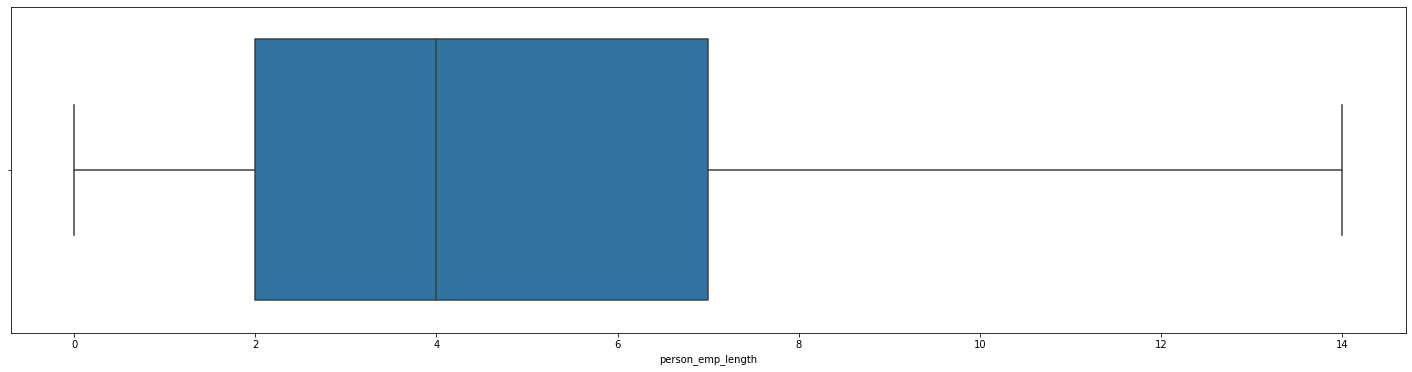

In [71]:
print(stats.describe(df_norm.person_emp_length))
sns.boxplot(df_norm.person_emp_length)

In [72]:
df_norm.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length            755
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
dtype: int64

In [73]:
df_norm=df_norm.dropna(how='any',axis=0)

In [74]:
df_norm

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
3,0.413869,7.275371,RENT,4.0,MEDICAL,C,48.040425,15.23,DENY,-0.578360,N
4,0.413890,7.200196,RENT,8.0,MEDICAL,C,48.040425,14.27,DENY,-0.547542,Y
6,0.413924,7.340443,RENT,8.0,EDUCATION,B,48.040425,12.42,DENY,-0.710495,N
7,0.413890,7.349864,RENT,5.0,MEDICAL,B,48.040425,11.11,DENY,-0.728144,N
8,0.413890,7.369586,RENT,8.0,PERSONAL,A,48.040425,8.90,DENY,-0.764304,N
...,...,...,...,...,...,...,...,...,...,...,...
32576,0.414059,7.189549,MORTGAGE,1.0,PERSONAL,C,29.607430,13.16,APPROVE,-1.616753,N
32577,0.414055,7.512662,MORTGAGE,4.0,PERSONAL,A,40.044314,7.49,APPROVE,-1.448578,N
32578,0.414065,7.334744,RENT,3.0,HOMEIMPROVEMENT,B,48.040425,10.99,DENY,-0.693120,N
32579,0.414058,7.597182,MORTGAGE,5.0,PERSONAL,B,38.350036,11.48,APPROVE,-1.665383,N


In [75]:
df_norm.loan_amnt.describe()

count    27354.000000
mean        32.552362
std          6.021182
min         14.490938
25%         28.414757
50%         32.343734
75%         36.373989
max         48.040425
Name: loan_amnt, dtype: float64

## STANDARDIZE

In [76]:
df_norm.isnull().sum()

person_age                   0
person_income                0
person_home_ownership        0
person_emp_length            0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [77]:
from sklearn.preprocessing import StandardScaler
# selectiong only the numerical columns
df_norm_num = df_norm.select_dtypes(include = np.number)
print('Before standardization:\n ',df_norm_num .head())
# standardize data
scaler = StandardScaler(with_mean=True).fit(df_norm_num)
df_norm_num_standardized = scaler.transform(df_norm_num)
df_norm_num_standardized  = pd.DataFrame(df_norm_num_standardized, columns = df_norm_num.columns)
print('\nAfter Standardized: \n',df_norm_num_standardized .head())

Before standardization:
     person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
3    0.413869       7.275371                4.0  48.040425          15.23   
4    0.413890       7.200196                8.0  48.040425          14.27   
6    0.413924       7.340443                8.0  48.040425          12.42   
7    0.413890       7.349864                5.0  48.040425          11.11   
8    0.413890       7.369586                8.0  48.040425           8.90   

   loan_percent_income  
3            -0.578360  
4            -0.547542  
6            -0.710495  
7            -0.728144  
8            -0.764304  

After Standardized: 
    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.913981       0.324312          -0.128153    2.57231       1.299444   
1   -0.559945      -0.038646           1.036661    2.57231       1.001730   
2    0.014916       0.638491           1.036661    2.57231       0.428010   
3   -0.559945       0.683975  

## CREATE DUMMIES OF CATEGORICALS

In [78]:
from sklearn.preprocessing import OneHotEncoder
df_norm_cat = df_norm.select_dtypes(include = np.object).drop(columns = 'loan_status')

enc = OneHotEncoder(drop = "first")

df_norm_cat = pd.DataFrame(enc.fit_transform(df_norm_cat).toarray(),columns = enc.get_feature_names())

In [79]:
df_norm_cat=df_norm_cat.rename(columns={'x0_OTHER':'ownership_other','x0_OWN':'ownership_own','x0_RENT':'ownership_rent','x1_EDUCATION':'intent_education','x1_HOMEIMPROVEMENT':'intent_homeimprovement','x1_MEDICAL':'intent_medical','x1_PERSONAL':'intent_personal','x1_VENTURE':'intentn_venture','x2_B':'grade_B','x2_C':'grade_C','x2_D':'grade_D','x2_E':'grade_E','x2_F':'grade_F','x2_G':'grade_G','x3_Y':'prev_default'})

In [80]:
df_norm_cat

,ownership_other,ownership_own,ownership_rent,intent_education,intent_homeimprovement,intent_medical,intent_personal,intentn_venture,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,prev_default
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27350,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27351,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27352,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
#dropped in dummy creation
#ownership: MORTGAGE
#use of loan: DEBTCONSOLIDATION
# grade: A
# default in history: No was dropped

## CONCATINATE

In [82]:
df=pd.concat([df_norm_num_standardized,df_norm_cat],axis=1)

## TEST AND TRAIN

In [83]:
X=df
y=df_norm.loan_status

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)